In [22]:
%matplotlib inline

import numpy as np
import torch
import matplotlib.pyplot as plt

#from helper2 import generate_dataset, visualize_one_dataset, visualize_datasets, predict_grid, visualize_predictions
from torch.utils import data

%load_ext autoreload
%autoreload 2

import torchvision

from time import time
from torchvision import datasets, transforms
from torch import nn, optim

from helpers_opt_parameters import *
from sdlbfgs import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

### MNIST dataset
The MNIST dataset is loaded.

In [27]:
trainset = datasets.MNIST('', download=True, train=True, transform=transform)
valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)

In [28]:
print("Training and test sets information is displayed.\n\n")
print("Trainset:\n",trainset)
print("Testset:\n",valset)

Training and test sets information is displayed.


Trainset:
 Dataset MNIST
    Number of datapoints: 60000
    Root location: 
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )
Testset:
 Dataset MNIST
    Number of datapoints: 10000
    Root location: PATH_TO_STORE_TESTSET
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )


# LBFGS mini-batch hyperparameters tuning 



In [29]:
minibatch_size_grid=[100,500,1000]
history_size_grid=[5,10]

In [30]:
epochs = 30

### Fully connected network

In [31]:
training_loss_fcnn, test_loss_fcnn,training_accuracy_fcnn, test_accuracy_fcnn, time_fcnn =hyperparameters_tuning_LBFGS_minibatch(trainset,valset,minibatch_size_grid, history_size_grid, epochs, "FCNN")

Minibatch size:  100
History size:  5
Epoch 0
Training loss: 0.0562841117677029
Number Of Images Tested = 10000
Model Accuracy = 0.9272
Number Of Images Tested = 60000
Model Accuracy = 0.9269
Test loss: 0.3537175477296114 

Epoch 1
Training loss: 0.01916525348460103
Number Of Images Tested = 10000
Model Accuracy = 0.9317
Number Of Images Tested = 60000
Model Accuracy = 0.93265
Test loss: 0.412242785282433 


Training Time (in minutes) = 1.5864850680033367




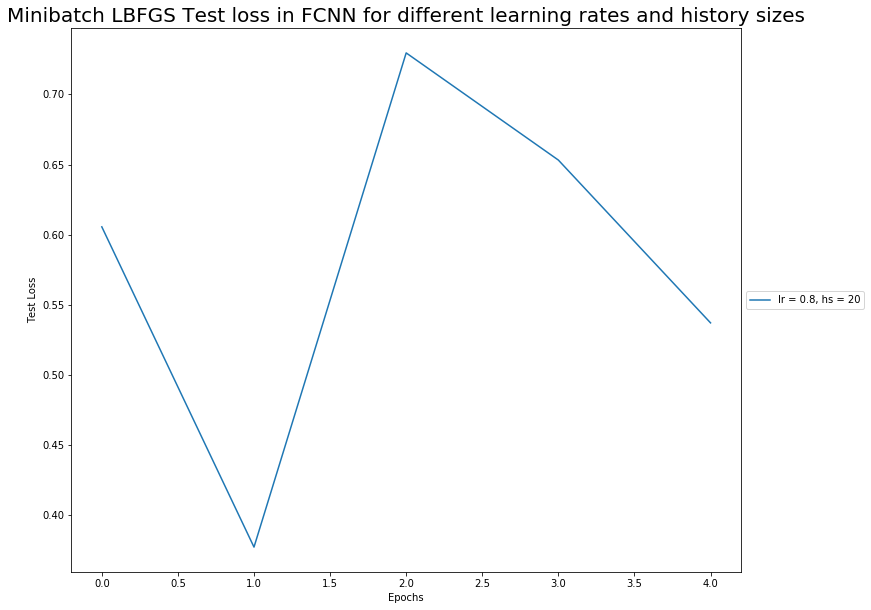

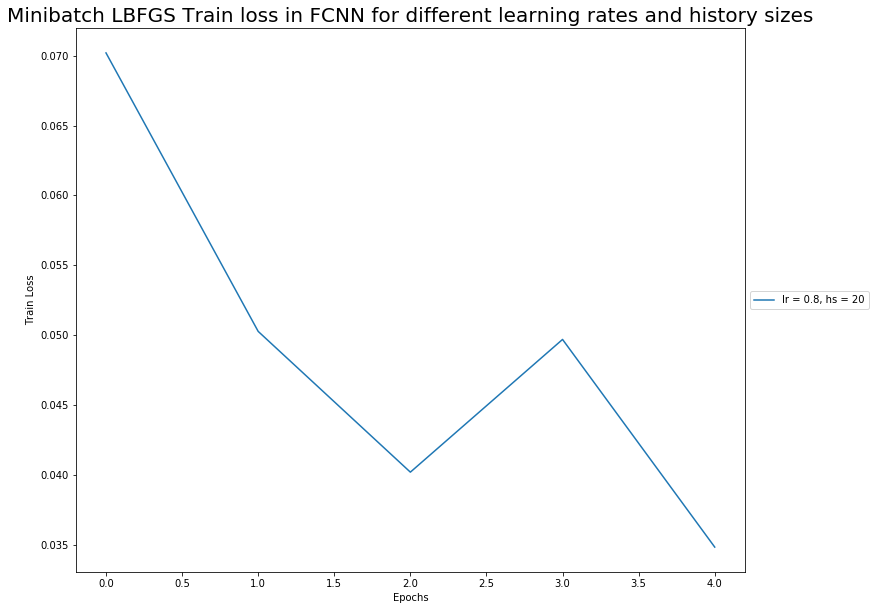

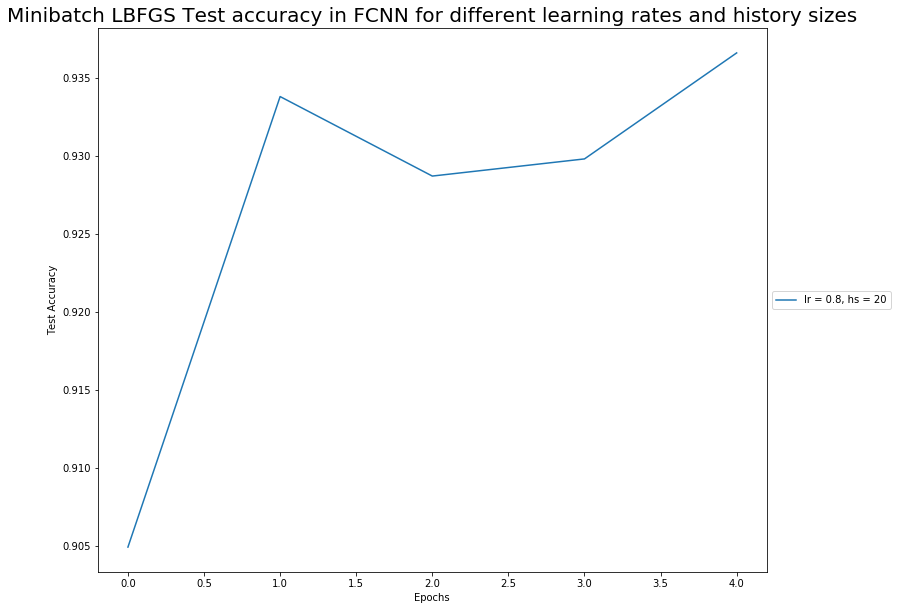

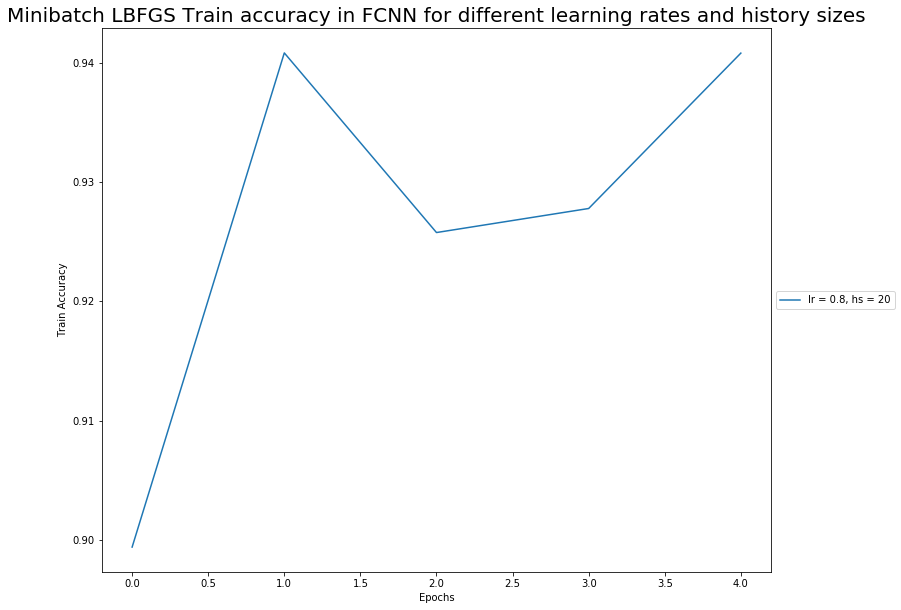

In [54]:
for bs_index,bs in enumerate(minibatch_size_grid):
    for hs_index,hs in enumerate(history_size_grid):
        plt.figure(1, figsize = (12,10))
        plt.plot(test_loss_fcnn[hs_index*bs_index+hs_index],label='bs = {}, hs = {}'.format(bs,hs))
        plt.figure(2, figsize = (12,10))
        plt.plot(training_loss_fcnn[hs_index*bs_index+hs_index],label='bs = {}, hs = {}'.format(bs,hs))
        plt.figure(3, figsize = (12,10))
        plt.plot(test_accuracy_fcnn[hs_index*bs_index+hs_index],label='bs = {}, hs = {}'.format(bs,hs))
        plt.figure(4, figsize = (12,10))
        plt.plot(training_accuracy_fcnn[hs_index*bs_index+hs_index],label='bs = {}, hs = {}'.format(bs,hs))

plt.figure(1)
plt.xlabel('Epochs')
plt.ylabel('Test Loss')
plt.title('Minibatch LBFGS Test loss in FCNN for different batch sizes and history sizes',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("mini_LBFGS_test_loss_fcnn.jpg")
plt.figure (2)
plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.title('Minibatch LBFGS Train loss in FCNN for different batch sizes and history sizes',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("mini_LBFGS_train_loss_fcnn.jpg")
plt.figure (3)
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('Minibatch LBFGS Test accuracy in FCNN for different batch sizes and history sizes',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("mini_LBFGS_test_acc_fcnn.jpg")
plt.figure (4)
plt.xlabel('Epochs')
plt.ylabel('Train Accuracy')
plt.title('Minibatch LBFGS Train accuracy in FCNN for different batch sizes and history sizes',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("mini_LBFGS_train_acc_fcnn.jpg")

In [0]:
np.savetxt('LBFGS_minibatch_fcNN_trainloss.txt', training_loss_fcnn)
np.savetxt('LBFGS_minibatch_fcNN_testloss.txt', test_loss_fcnn)
np.savetxt('LBFGS_minibatch_fcNN_trainacc.txt', training_accuracy_fcnn)
np.savetxt('LBFGS_minibatch_fcNN_testacc.txt', test_accuracy_fcnn)
np.savetxt('LBFGS_minibatch_fcNN_times.txt',time_fcnn)